#### Audio Classification Data Preprocessing

In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path = r'E:\Software\UrbanSound8K\UrbanSound8K\audio\fold1\7061-6-0-0.wav'

librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[-7.4505806e-09  2.9802322e-08  4.8428774e-08 ...  1.0127544e-05
  2.3271263e-05  7.0009992e-06]


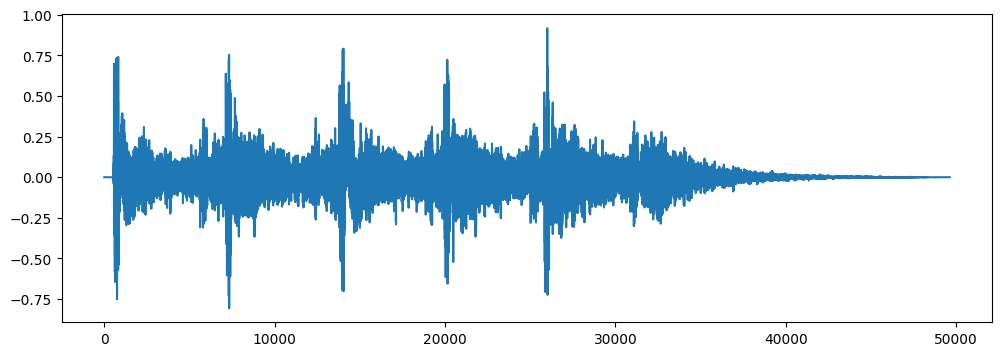

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)


Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

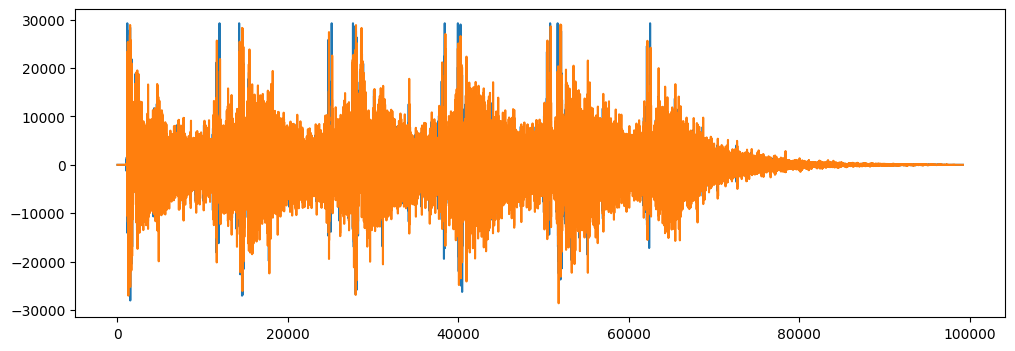

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)


Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [8]:
mfccs

array([[-1.2721312e+02,  8.0479221e+00,  1.6004412e+01, ...,
        -5.6935333e+02, -5.9172754e+02, -6.1065784e+02],
       [ 3.0020668e+01,  2.2940346e+01,  1.0669682e+01, ...,
         4.3051193e+01,  2.5888042e+01,  1.2829786e+01],
       [-2.5360155e+00, -1.1252435e+01, -1.4259802e+01, ...,
        -1.1103722e+01, -7.5506268e+00,  2.0151618e-01],
       ...,
       [ 3.2335854e-01, -3.5481024e+00, -5.0293407e+00, ...,
         2.4095781e+00,  3.1699724e+00, -2.1270427e-01],
       [-9.7800570e+00, -9.0905132e+00, -6.1912656e+00, ...,
        -5.0198972e-02,  7.2895074e-01, -9.0055245e-01],
       [ 1.6566066e+00,  1.8223329e+00,  2.8306212e+00, ...,
        -2.0609212e+00, -2.2312660e+00, -1.7745861e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r'E:\Software\UrbanSound8K\UrbanSound8K\audio'
metadata = pd.read_csv(r'E:\Software\UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [11]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [03:23, 18.21it/s]C:\Users\HP\miniconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [08:10, 22.67it/s]C:\Users\HP\miniconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\HP\miniconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [08:34, 16.99it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature             class
0  [-217.35526, 70.22339, -130.38527, -53.282898,...          dog_bark
1  [-424.09818, 109.34077, -52.919525, 60.86475, ...  children_playing
2  [-458.79114, 121.38419, -46.520657, 52.00812, ...  children_playing
3  [-413.89984, 101.66371, -35.42945, 53.036354, ...  children_playing
4  [-446.60352, 113.68541, -52.402214, 60.302044,...  children_playing

In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352815e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009026e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811926e+00, -2.00917006e+00, -8.82181764e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651115e+00]], dtype=float32)

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [21]:
X_train.shape

(6985, 40)

In [22]:
X_test.shape

(1747, 40)

In [23]:
y_train.shape

(6985, 10)

In [24]:
y_test.shape

(1747, 10)

In [40]:
# Cell 20
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Cell 22
# Load the transformer model and tokenizer
transformer_model = TFAutoModel.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Cell 25
# Tokenize the input audio features
def tokenize_audio(audio_file_path):
    audio, sample_rate = librosa.load(audio_file_path, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return tokenizer(mfccs_scaled_features, padding=True, truncation=True, return_tensors="tf")

# Cell 26
# Modify the model architecture to include a transformer layer
model = Sequential([
    transformer_model,
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(200, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(num_labels, activation='softmax')
])

# Cell 24
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Cell 25
# Fit the model
start = datetime.now()
model.fit(tokenize_audio(X_train), y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(tokenize_audio(X_test), y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

# Cell 26
# Evaluate the model
test_accuracy = model.evaluate(tokenize_audio(X_test), y_test, verbose=0)
print(test_accuracy[1])

# Cell 27 (Optional)
# Make predictions
filename = r"E:\Software\UrbanSound8K\UrbanSound8K\audio\fold4\344-3-5-0.wav"
tokenized_audio = tokenize_audio(filename)
predicted_probabilities = model.predict(tokenized_audio)
predicted_label = np.argmax(predicted_probabilities, axis=1)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <transformers.models.bert.modeling_tf_bert.TFBertModel object at 0x0000024B72484940> (of type <class 'transformers.models.bert.modeling_tf_bert.TFBertModel'>)

In [25]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
### No of classes
num_labels=y.shape[1]

In [28]:
# model=Sequential()
# ###first layer
# model.add(Dense(100,input_shape=(40,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###second layer
# model.add(Dense(200))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###third layer
# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# ###final layer
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))
model=Sequential()
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))


C:\Users\HP\miniconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
# ## Trianing my model
# from tensorflow.keras.callbacks import ModelCheckpoint
# from datetime import datetime 

# num_epochs = 100
# num_batch_size = 32

# checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
#                                verbose=1, save_best_only=True)
# start = datetime.now()

# model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


# duration = datetime.now() - start
# print("Training completed in time: ", duration)

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
211/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1157 - loss: 24.6130
Epoch 1: val_loss improved from inf to 2.28832, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1160 - loss: 24.0977 - val_accuracy: 0.1145 - val_loss: 2.2883
Epoch 2/100
207/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1190 - loss: 2.8256
Epoch 2: val_loss improved from 2.28832 to 2.28121, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1192 - loss: 2.8145 - val_accuracy: 0.1156 - val_loss: 2.2812
Epoch 3/100
215/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1134 - loss: 2.3458
Epoch 3: val_loss improved from 2.28121 to 2.21993, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1136 - loss: 2.3453 - val_accuracy: 0.1769 - val_loss: 2.2199
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [32]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7664567828178406


In [33]:
# prediction_feature.shape

In [34]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.013893  ,   35.33935   ,
        -14.881481  ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339073  ,    7.673634  ,  -29.16449   ,  -18.950254  ,
         -2.9579997 ,   -8.162331  ,  -15.153101  ,   -6.6048055 ,
         -7.568598  ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630231  ,
         -1.0564743 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.53346074,  -23.84339   ,
        -15.267321  ,    9.245735  ,   10.367627  ,   -0.58320105,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.186282  ],
      dtype=float32)

In [35]:
# import numpy as np

# # Assuming you have a trained model named 'model'
# # Use model.predict to get the predicted probabilities for each class
# predicted_probabilities = model.predict(X_test)

# # Use numpy argmax to get the index of the class with the highest probability for each sample
# predicted_classes = np.argmax(predicted_probabilities, axis=1)

# # Now 'predicted_classes' contains the predicted class labels for each sample in X_test


### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [36]:
filename=r"E:\Software\UrbanSound8K\UrbanSound8K\audio\fold4\344-3-5-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)

print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.92937164e+02  1.23184319e+02 -1.78010750e+01 -1.94697914e+01
 -3.48717575e+01 -4.97947693e+00 -3.35929070e+01 -1.45469885e+01
 -1.09566488e+01  2.40524840e+00 -2.68108654e+00 -4.90553808e+00
 -1.10568361e+01  9.42309678e-01  5.58117151e+00  3.96217585e+00
 -1.43357837e+00 -5.29406929e+00 -6.70389080e+00 -8.87814999e-01
 -5.83871222e+00 -1.04018383e+01 -9.15907001e+00 -1.29951096e+00
 -5.62726438e-01  1.59159636e+00  3.24745893e+00  1.48637176e+00
  4.91334343e+00  2.75690794e+00 -6.43363714e-01 -1.91020846e+00
  4.44814563e-01  7.89780542e-02 -2.89156646e-01 -9.20093060e-01
 -1.92482638e+00  8.13530684e-01  1.19871950e+00  5.90302408e-01]
[[-2.92937164e+02  1.23184319e+02 -1.78010750e+01 -1.94697914e+01
  -3.48717575e+01 -4.97947693e+00 -3.35929070e+01 -1.45469885e+01
  -1.09566488e+01  2.40524840e+00 -2.68108654e+00 -4.90553808e+00
  -1.10568361e+01  9.42309678e-01  5.58117151e+00  3.96217585e+00
  -1.43357837e+00 -5.29406929e+00 -6.70389080e+00 -8.87814999e-01
  -5.83871222e+00 -

array(['dog_bark'], dtype='<U16')